In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

In [42]:
import pandas as pd

# Load the data
data = pd.read_csv('C:/Thesis-script/Data/biodata6010.csv')

# Delete the specified columns
data.drop(columns=['stress_label_scl', 'stress_label_scr', 'stress_label_hrv_rmssd'], inplace=True)

# Rename 'tlx_stress_label' to 'stress_label'
data.rename(columns={'tlx_stress_label': 'stress_label'}, inplace=True)

# Optionally, save the modified DataFrame back to CSV
data.to_csv('C:/Thesis-script/Data/biodata60101.csv', index=False)


In [43]:
data = pd.read_csv('C:/Thesis-script/Data/biodata60101.csv')
data



,Participant ID,Experiment,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,...,hrv_SD2,hrv_SD2_SD1,hrv_CSI,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn,tlx_weighted_rating,tlx_z_score,stress_label
0,5,AX,0.51,0.45,1.03,-1.36,2.39,3.29,-1.74,0.20,...,244.99,1.27,1.27,5.88,1247.63,0.89,2.11,67.33,1.69,2
1,5,AX,0.39,0.52,1.02,-1.36,2.38,1.57,-1.50,0.27,...,236.98,1.23,1.23,5.86,1168.45,0.95,1.98,67.33,1.69,2
2,5,AX,0.16,0.75,0.92,-2.47,3.39,1.91,-1.57,0.56,...,228.23,1.17,1.17,5.85,1064.53,0.98,2.07,67.33,1.69,2
3,5,AX,0.11,0.72,0.87,-2.47,3.35,2.11,-1.59,0.52,...,220.42,1.16,1.16,5.83,1019.89,1.02,2.11,67.33,1.69,2
4,5,AX,0.12,0.70,0.87,-2.47,3.35,2.64,-1.72,0.49,...,213.05,1.12,1.12,5.81,955.28,1.07,2.14,67.33,1.69,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,19,CY,0.25,0.65,3.37,-1.30,4.67,3.84,1.01,0.42,...,206.60,1.41,1.41,5.69,1161.86,1.15,1.63,2.67,-1.52,0
1431,19,CY,0.11,0.74,3.37,-1.65,5.02,2.56,0.67,0.54,...,196.13,1.32,1.32,5.67,1033.68,1.15,1.75,2.67,-1.52,0
1432,19,CY,0.06,0.92,4.00,-1.98,5.98,2.87,0.88,0.85,...,197.17,1.30,1.30,5.68,1023.16,1.14,1.86,2.67,-1.52,0
1433,19,CY,-0.03,1.08,4.00,-3.77,7.77,2.38,0.07,1.16,...,196.16,1.25,1.25,5.69,977.11,1.11,1.85,2.67,-1.52,0


In [44]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Participant ID       1435 non-null   int64  
 1   Experiment           1435 non-null   object 
 2   eda_mean             1435 non-null   float64
 3   eda_std              1435 non-null   float64
 4   eda_max              1435 non-null   float64
 5   eda_min              1435 non-null   float64
 6   eda_range            1435 non-null   float64
 7   eda_kurtosis         1435 non-null   float64
 8   eda_skew             1435 non-null   float64
 9   eda_momentum         1435 non-null   float64
 10  eda_f1sc             1435 non-null   float64
 11  eda_f2sc             1435 non-null   float64
 12  eda_f3sc             1435 non-null   float64
 13  eda_Energy           1435 non-null   float64
 14  eda_Entropy          1435 non-null   float64
 15  eda_max_freq         1435 non-null   f

(1435, 87)

In [45]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Participant ID,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,eda_f1sc,...,hrv_SD2,hrv_SD2_SD1,hrv_CSI,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn,tlx_weighted_rating,tlx_z_score,stress_label
count,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,...,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
mean,11.51,0.01,0.72,1.88,-1.82,3.70,2.01,0.03,0.60,108.98,...,212.83,1.16,1.16,5.79,993.06,0.97,1.97,40.65,0.37,0.93
std,4.40,0.49,0.29,1.28,1.36,1.77,5.51,1.33,0.44,293.59,...,27.55,0.11,0.11,0.10,186.86,0.12,0.29,19.52,0.97,0.79
min,5.00,-1.43,0.13,-0.78,-7.83,0.48,-1.72,-4.89,0.02,0.12,...,152.79,0.86,0.86,5.51,644.55,0.56,0.62,0.67,-1.62,0.00
25%,8.00,-0.33,0.50,1.07,-2.16,2.47,-0.43,-0.52,0.25,7.68,...,194.11,1.09,1.09,5.72,862.31,0.89,1.84,26.00,-0.36,0.00
50%,12.00,0.01,0.71,1.77,-1.49,3.43,0.35,0.13,0.51,28.37,...,207.98,1.16,1.16,5.79,962.86,0.98,1.98,46.00,0.63,1.00
75%,15.00,0.37,0.94,2.49,-0.99,4.62,1.96,0.66,0.88,88.79,...,228.83,1.23,1.23,5.86,1104.52,1.05,2.12,58.00,1.23,2.00
max,19.00,1.48,1.45,8.73,0.63,13.98,58.76,7.46,2.09,5471.21,...,343.58,1.59,1.59,6.08,2188.39,1.24,3.02,76.67,2.15,2.00


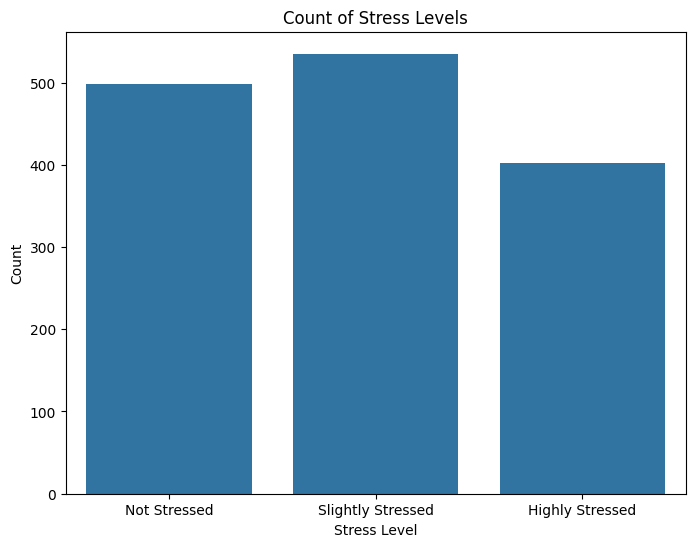

In [46]:
stress_counts = data['stress_label'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=stress_counts.index, y=stress_counts.values)
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Not Stressed', 'Slightly Stressed', 'Highly Stressed'])

plt.show()


Unique Experiments: ['AX' 'BY' 'BZ' 'CX' 'CY' 'CZ' 'BX']


<Figure size 1200x800 with 0 Axes>

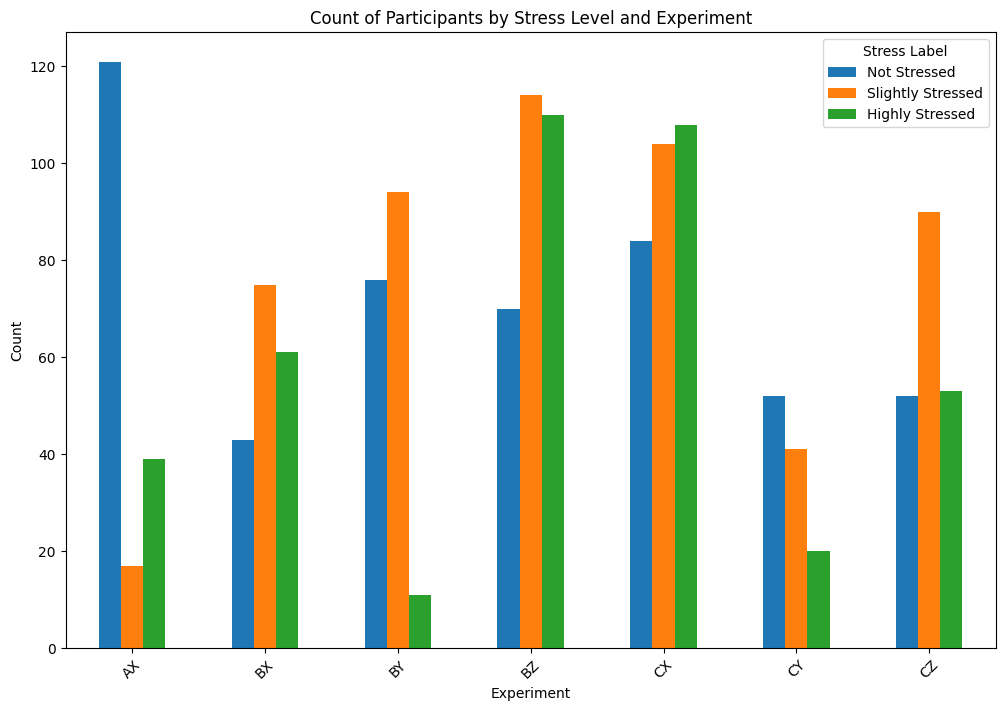

In [48]:
# To show the distribution of stress labels for each experiment,

unique_experiments = data['Experiment'].unique()
print(f"Unique Experiments: {unique_experiments}")


stress_counts_by_experiment = data.groupby(['Experiment', 'stress_label']).size().unstack()


plt.figure(figsize=(12, 8))
stress_counts_by_experiment.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.title('Count of Participants by Stress Level and Experiment')
plt.xlabel('Experiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stress Label', labels=['Not Stressed', 'Slightly Stressed', 'Highly Stressed'])

plt.show()


<Figure size 1200x800 with 0 Axes>

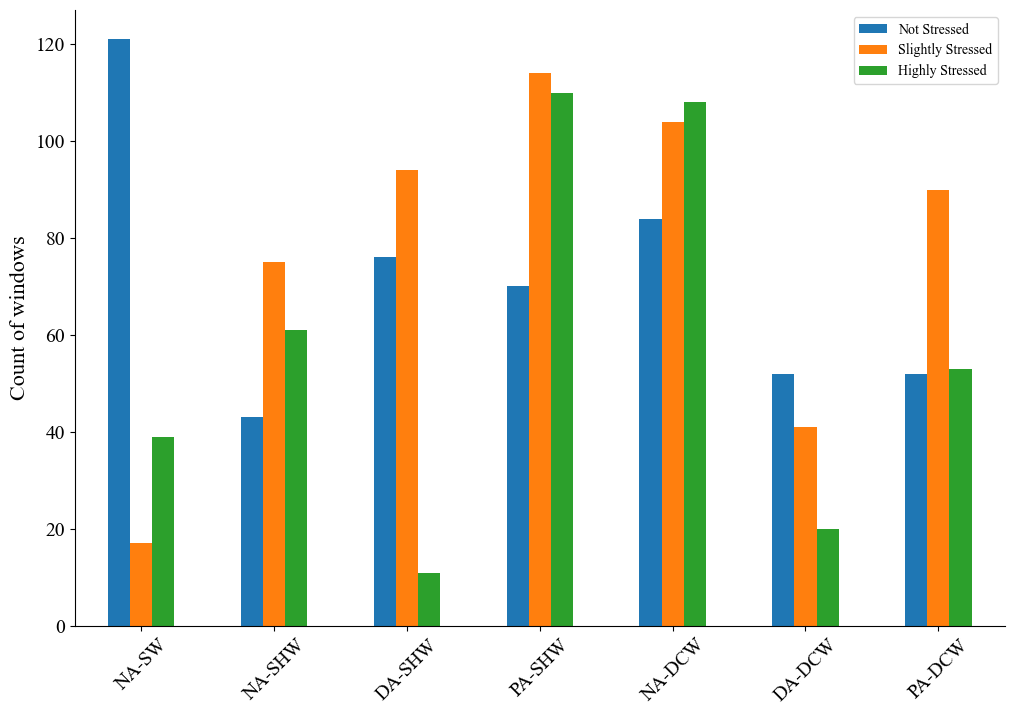

In [88]:
# Mapping of existing labels to new notations to match sscheme in the thesis report
label_mapping = {
    'AX': 'NA-SW',
    'BX': 'NA-SHW',
    'BY': 'DA-SHW',
    'BZ': 'PA-SHW',
    'CX': 'NA-DCW',
    'CY': 'DA-DCW',
    'CZ': 'PA-DCW'
}

# Replace existing labels with new descriptive notations
stress_counts_by_experiment = stress_counts_by_experiment.rename(index=label_mapping)



# Plotting
plt.figure(figsize=(12, 8))
stress_counts_by_experiment.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.xlabel('', fontsize=16)
plt.ylabel('Count of windows', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend( labels=['Not Stressed', 'Slightly Stressed', 'Highly Stressed'], fontsize=10)

# Remove the frame around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)  # Bring back the y-axis
plt.gca().spines['bottom'].set_visible(True) 

plt.savefig('stress_levels_by_experiment.pdf', bbox_inches='tight', pad_inches=0)
plt.show()


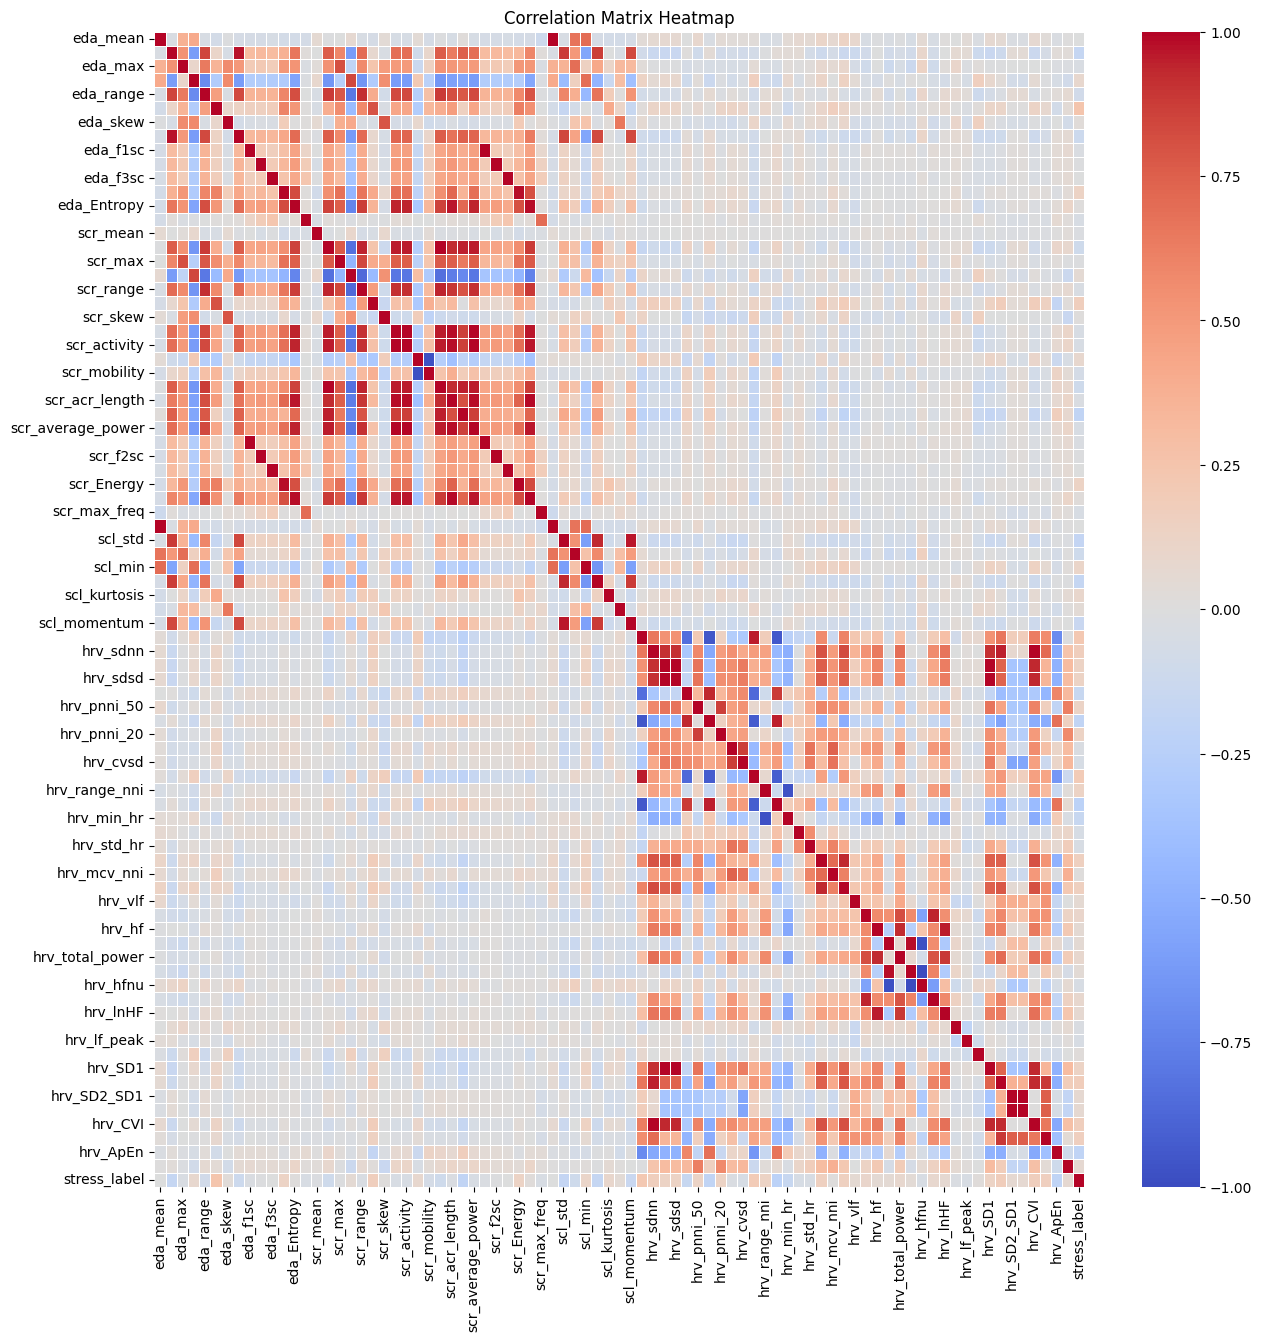

In [49]:
#numeric_data_reloaded = data.select_dtypes(include=[np.number]).dropna(axis=1)
#numeric_data_reloaded.drop(['Participant ID','stress_label', 'Experiment', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1)


numeric_data_reloaded = data.select_dtypes(include=[np.number]).drop(['Participant ID', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1).dropna(axis=1)


# Generating the correlation matrix again
correlation_matrix_reloaded = numeric_data_reloaded.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_reloaded, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
correlation_matrix = numeric_data_reloaded.corr()

# Set the threshold for low correlation with the target variable
# Features with a correlation coefficient within the range (-threshold, threshold) will be dropped
threshold = 0.1  # You can adjust the threshold value as needed

# Find features with low correlation with the target variable ('stress_label')
low_corr_with_target = correlation_matrix['stress_label'][(correlation_matrix['stress_label'].abs() < threshold) & (correlation_matrix.index != 'stress_label')]

# Drop the low correlation features from the dataset
data_reduced = data.drop(columns=low_corr_with_target.index)

# Print out the features that are being dropped
print("Dropped features due to low correlation with target variable:")
print(low_corr_with_target.index.tolist())

# The remaining features after dropping
remaining_features = data_reduced.columns.tolist()
print("\nRemaining features:")
print(remaining_features)

Dropped features due to low correlation with target variable:
['eda_mean', 'eda_max', 'eda_min', 'eda_range', 'eda_skew', 'eda_f1sc', 'eda_f2sc', 'eda_f3sc', 'eda_Entropy', 'eda_max_freq', 'scr_mean', 'scr_max', 'scr_min', 'scr_range', 'scr_skew', 'scr_momentum', 'scr_activity', 'scr_complexity', 'scr_mobility', 'scr_acr_length', 'scr_average_power', 'scr_f1sc', 'scr_f2sc', 'scr_f3sc', 'scr_Entropy', 'scr_max_freq', 'scl_mean', 'scl_kurtosis', 'scl_skew', 'hrv_cvnni', 'hrv_cvsd', 'hrv_max_hr', 'hrv_std_hr', 'hrv_mcv_nni', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_lf_hf_ratio', 'hrv_total_power', 'hrv_lfnu', 'hrv_hfnu', 'hrv_lnLF', 'hrv_lnHF', 'hrv_vlf_peak', 'hrv_lf_peak', 'hrv_hf_peak', 'hrv_SD2_SD1', 'hrv_CSI', 'hrv_SampEn']

Remaining features:
['Participant ID', 'Experiment', 'eda_std', 'eda_kurtosis', 'eda_momentum', 'eda_Energy', 'scr_std', 'scr_kurtosis', 'scr_rms', 'scr_integral', 'scr_Energy', 'scl_std', 'scl_max', 'scl_min', 'scl_range', 'scl_momentum', 'hrv_mean_nni', 'hrv_sdnn', 

In [61]:
# Assuming 'final_stress_label' is your target variable
#X = data_reduced.drop('stress_label', axis=1)  # features
#y = data_reduced['stress_label']                # target

#X = data_reduced.drop(['Participant ID','stress_label', 'Experiment', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1)
#X


# Assuming 'final_stress_label' is your target variable
X = data.drop('stress_label', axis=1)  # features
y = data['stress_label']                # target

X = data.drop(['Participant ID','stress_label', 'Experiment', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1)
X

,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,eda_f1sc,eda_f2sc,...,hrv_lf_peak,hrv_hf_peak,hrv_SD1,hrv_SD2,hrv_SD2_SD1,hrv_CSI,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn
0,0.51,0.45,1.03,-1.36,2.39,3.29,-1.74,0.20,6.24,5.81,...,0.09,0.30,192.42,244.99,1.27,1.27,5.88,1247.63,0.89,2.11
1,0.39,0.52,1.02,-1.36,2.38,1.57,-1.50,0.27,63.17,3.54,...,0.10,0.30,192.26,236.98,1.23,1.23,5.86,1168.45,0.95,1.98
2,0.16,0.75,0.92,-2.47,3.39,1.91,-1.57,0.56,78.10,61.20,...,0.09,0.30,195.73,228.23,1.17,1.17,5.85,1064.53,0.98,2.07
3,0.11,0.72,0.87,-2.47,3.35,2.11,-1.59,0.52,129.76,81.20,...,0.09,0.30,190.55,220.42,1.16,1.16,5.83,1019.89,1.02,2.11
4,0.12,0.70,0.87,-2.47,3.35,2.64,-1.72,0.49,7.86,134.04,...,0.06,0.30,190.05,213.05,1.12,1.12,5.81,955.28,1.07,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.25,0.65,3.37,-1.30,4.67,3.84,1.01,0.42,33.05,69.40,...,0.04,0.17,146.94,206.60,1.41,1.41,5.69,1161.86,1.15,1.63
1431,0.11,0.74,3.37,-1.65,5.02,2.56,0.67,0.54,140.54,34.09,...,0.04,0.17,148.86,196.13,1.32,1.32,5.67,1033.68,1.15,1.75
1432,0.06,0.92,4.00,-1.98,5.98,2.87,0.88,0.85,88.38,146.13,...,0.05,0.17,151.98,197.17,1.30,1.30,5.68,1023.16,1.14,1.86
1433,-0.03,1.08,4.00,-3.77,7.77,2.38,0.07,1.16,1564.88,90.40,...,0.04,0.18,157.52,196.16,1.25,1.25,5.69,977.11,1.11,1.85


In [62]:
data_reduced
print(data_reduced.info())
print(data_reduced.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Participant ID       1435 non-null   int64  
 1   Experiment           1435 non-null   object 
 2   eda_std              1435 non-null   float64
 3   eda_kurtosis         1435 non-null   float64
 4   eda_momentum         1435 non-null   float64
 5   eda_Energy           1435 non-null   float64
 6   scr_std              1435 non-null   float64
 7   scr_kurtosis         1435 non-null   float64
 8   scr_rms              1435 non-null   float64
 9   scr_integral         1435 non-null   float64
 10  scr_Energy           1435 non-null   float64
 11  scl_std              1435 non-null   float64
 12  scl_max              1435 non-null   float64
 13  scl_min              1435 non-null   float64
 14  scl_range            1435 non-null   float64
 15  scl_momentum         1435 non-null   f

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [105]:
data


,Participant ID,Experiment,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,...,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn,stress_label_scl,stress_label_scr,stress_label_hrv_rmssd,tlx_weighted_rating,tlx_z_score,stress_label
0,5,AX,0.51,0.45,1.03,-1.36,2.39,3.29,-1.74,0.20,...,5.88,1247.63,0.89,2.11,1,0,1,67.33,1.69,2
1,5,AX,0.39,0.52,1.02,-1.36,2.38,1.57,-1.50,0.27,...,5.86,1168.45,0.95,1.98,1,0,0,67.33,1.69,2
2,5,AX,0.16,0.75,0.92,-2.47,3.39,1.91,-1.57,0.56,...,5.85,1064.53,0.98,2.07,0,0,1,67.33,1.69,2
3,5,AX,0.11,0.72,0.87,-2.47,3.35,2.11,-1.59,0.52,...,5.83,1019.89,1.02,2.11,0,0,0,67.33,1.69,2
4,5,AX,0.12,0.70,0.87,-2.47,3.35,2.64,-1.72,0.49,...,5.81,955.28,1.07,2.14,0,0,0,67.33,1.69,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,19,CY,0.25,0.65,3.37,-1.30,4.67,3.84,1.01,0.42,...,5.69,1161.86,1.15,1.63,0,0,0,2.67,-1.52,0
1431,19,CY,0.11,0.74,3.37,-1.65,5.02,2.56,0.67,0.54,...,5.67,1033.68,1.15,1.75,0,0,0,2.67,-1.52,0
1432,19,CY,0.06,0.92,4.00,-1.98,5.98,2.87,0.88,0.85,...,5.68,1023.16,1.14,1.86,0,0,0,2.67,-1.52,0
1433,19,CY,-0.03,1.08,4.00,-3.77,7.77,2.38,0.07,1.16,...,5.69,977.11,1.11,1.85,0,0,0,2.67,-1.52,0


In [39]:
#X = data_reduced.drop('stress_label', axis=1)  # features
#y = data['stress_label']                # target

#X = data_reduced.drop(['Participant ID','stress_label', 'Experiment' ], axis=1)
#X


,eda_std,eda_kurtosis,eda_momentum,eda_Energy,scr_std,scr_kurtosis,scr_rms,scr_integral,scr_Energy,scl_std,...,hrv_min_hr,hrv_mad_nni,hrv_iqr_nni,hrv_SD1,hrv_SD2,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,tlx_weighted_rating,tlx_z_score
0,0.45,3.29,0.20,7198355.63,0.23,9.03,0.23,866.66,4404982.52,0.35,...,44.14,148.44,308.59,192.42,244.99,5.88,1247.63,0.89,67.33,1.69
1,0.52,1.57,0.27,20189325.01,0.25,5.94,0.25,1033.96,6136089.31,0.44,...,44.14,125.00,281.25,192.26,236.98,5.86,1168.45,0.95,67.33,1.69
2,0.75,1.91,0.56,27257499.18,0.31,3.58,0.31,1274.55,8047804.42,0.61,...,44.14,125.00,265.62,195.73,228.23,5.85,1064.53,0.98,67.33,1.69
3,0.72,2.11,0.52,9231155.28,0.32,3.10,0.32,1390.19,8663008.45,0.58,...,44.14,109.38,250.00,190.55,220.42,5.83,1019.89,1.02,67.33,1.69
4,0.70,2.64,0.49,8277044.19,0.30,3.46,0.30,1264.63,7774776.59,0.58,...,44.14,109.38,250.00,190.05,213.05,5.81,955.28,1.07,67.33,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.65,3.84,0.42,244846348.57,0.49,14.15,0.49,1790.04,243173332.92,0.34,...,54.08,140.62,289.06,146.94,206.60,5.69,1161.86,1.15,2.67,-1.52
1431,0.74,2.56,0.54,281568474.09,0.51,11.17,0.51,1999.18,275065347.05,0.46,...,59.08,140.62,296.88,148.86,196.13,5.67,1033.68,1.15,2.67,-1.52
1432,0.92,2.87,0.85,733648283.44,0.72,12.28,0.72,2647.79,731405236.74,0.49,...,59.08,140.62,281.25,151.98,197.17,5.68,1023.16,1.14,2.67,-1.52
1433,1.08,2.38,1.16,751940058.13,0.80,8.77,0.80,3079.27,743560199.93,0.58,...,59.08,140.62,281.25,157.52,196.16,5.69,977.11,1.11,2.67,-1.52


In [23]:
X
y

0       2
1       2
2       2
3       2
4       2
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
Name: stress_label, Length: 1435, dtype: int64

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd



# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Define kernels to loop through
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize a DataFrame to store aggregated results
aggregated_results = pd.DataFrame()

# Loop over each kernel
for kernel in kernels:
    conf_matrix_list = []
    scores_list = []

    # Loop over each fold in KFold
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a pipeline that first scales the data then applies SVM
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel=kernel, C=1.0, gamma=0.1, probability=True, random_state=42))
        ])

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Predict on the test set
        y_pred = pipeline.predict(X_test)

        # Calculate the confusion matrix for this fold and add it to the list
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_list.append(conf_matrix)

        # Collect the scores for this fold
        scores_list.append({
            'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred, average='weighted'),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted')
        })

    # Aggregate the confusion matrices
    conf_matrix_sum = np.sum(conf_matrix_list, axis=0)

    # Convert the scores list to a DataFrame and calculate the mean of the scores
    mean_scores = pd.DataFrame(scores_list).mean().to_frame().T

    # Assign model name to the mean scores DataFrame
    mean_scores['Model'] = f'SVM with {kernel.capitalize()} Kernel'

    # Append the results to the aggregated_results DataFrame
    aggregated_results = pd.concat([aggregated_results, mean_scores], ignore_index=True)

# Reorder the columns to have 'Model' first
aggregated_results = aggregated_results[['Model', 'AUC', 'Accuracy', 'F1 Score', 'Precision', 'Recall']]

# Print the aggregated results in a table with model names
print("Aggregated Results (Mean of all folds):")
print(aggregated_results)


Aggregated Results (Mean of all folds):
                     Model  AUC  Accuracy  F1 Score  Precision  Recall
0   SVM with Linear Kernel 0.80      0.63      0.62       0.63    0.63
1     SVM with Poly Kernel 0.96      0.90      0.90       0.90    0.90
2      SVM with Rbf Kernel 0.99      0.92      0.92       0.93    0.92
3  SVM with Sigmoid Kernel 0.53      0.36      0.35       0.36    0.36


Support Vector Machine (SVM) 

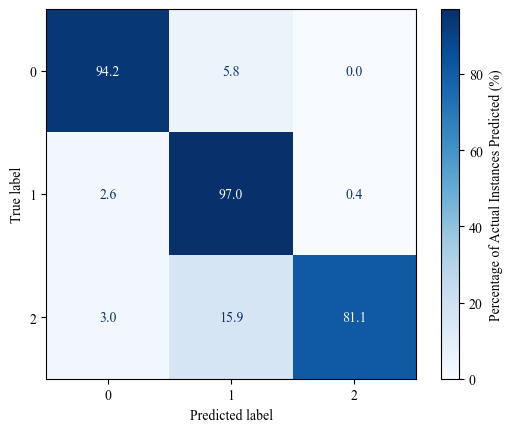

Mean Scores:
                      AUC  Accuracy  F1 Score  Precision  Recall
SVM with RBF Kernel 0.994     0.916     0.915      0.926   0.916


In [70]:
# SVM with K-fold cross-validation  rbf kernel
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with StandardScaler and SVM with RBF kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma=0.1, probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['SVM with RBF Kernel']

pd.set_option('display.precision', 3)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point


# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.show()

# Display the mean scores
# Display the mean scores with three significant figures
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


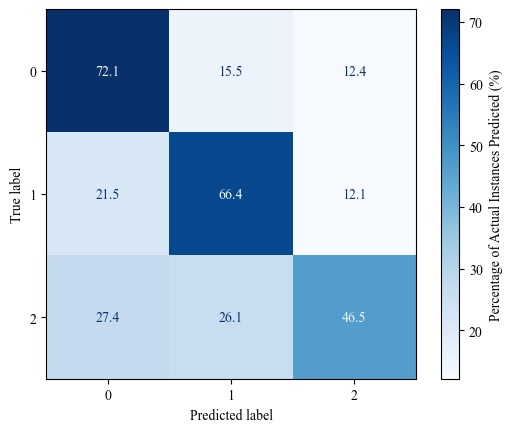

Mean Scores:
                         AUC  Accuracy  F1 Score  Precision  Recall
SVM with Linear Kernel 0.805     0.628     0.622      0.630   0.628


In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies SVM with linear kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=1.0, probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })


# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['SVM with Linear Kernel']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point


# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_linear_svm.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


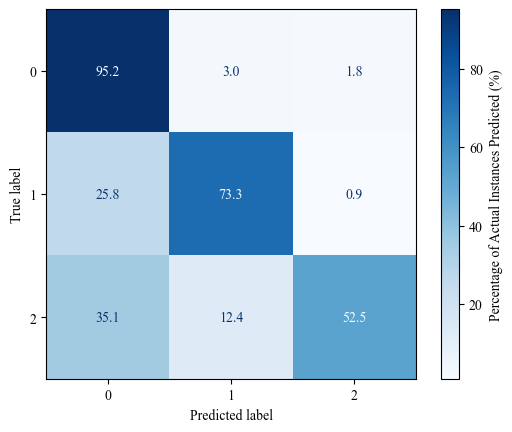

Mean Scores:
                                        AUC  Accuracy  F1 Score  Precision  Recall
SVM with Polynomial Kernel (degree=3) 0.946     0.750     0.745      0.803   0.750


In [71]:
#Polynomial kernel SVM

# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies SVM with polynomial kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='poly', C=1.0, degree=3, gamma='scale', probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['SVM with Polynomial Kernel (degree=3)']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_poly_svm.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


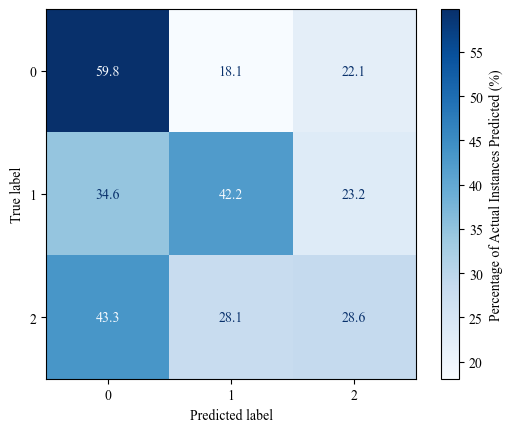

Mean Scores:
                          AUC  Accuracy  F1 Score  Precision  Recall
SVM with Sigmoid Kernel 0.599     0.445     0.440      0.449   0.445


In [72]:
#Sigmoid Kernel SVM
# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies SVM with sigmoid kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='sigmoid', C=1.0, gamma='scale', probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['SVM with Sigmoid Kernel']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_sigmoid_svm.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


SVM With Leave One Participant Out
auc removed because of class issue

In [75]:
X = data.drop('stress_label', axis=1)  # features
y = data['stress_label']                # target

X = data.drop(['stress_label', 'Experiment', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1)
X


,Participant ID,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,eda_f1sc,...,hrv_lf_peak,hrv_hf_peak,hrv_SD1,hrv_SD2,hrv_SD2_SD1,hrv_CSI,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn
0,5,0.51,0.45,1.03,-1.36,2.39,3.29,-1.74,0.20,6.24,...,0.09,0.30,192.42,244.99,1.27,1.27,5.88,1247.63,0.89,2.11
1,5,0.39,0.52,1.02,-1.36,2.38,1.57,-1.50,0.27,63.17,...,0.10,0.30,192.26,236.98,1.23,1.23,5.86,1168.45,0.95,1.98
2,5,0.16,0.75,0.92,-2.47,3.39,1.91,-1.57,0.56,78.10,...,0.09,0.30,195.73,228.23,1.17,1.17,5.85,1064.53,0.98,2.07
3,5,0.11,0.72,0.87,-2.47,3.35,2.11,-1.59,0.52,129.76,...,0.09,0.30,190.55,220.42,1.16,1.16,5.83,1019.89,1.02,2.11
4,5,0.12,0.70,0.87,-2.47,3.35,2.64,-1.72,0.49,7.86,...,0.06,0.30,190.05,213.05,1.12,1.12,5.81,955.28,1.07,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,19,0.25,0.65,3.37,-1.30,4.67,3.84,1.01,0.42,33.05,...,0.04,0.17,146.94,206.60,1.41,1.41,5.69,1161.86,1.15,1.63
1431,19,0.11,0.74,3.37,-1.65,5.02,2.56,0.67,0.54,140.54,...,0.04,0.17,148.86,196.13,1.32,1.32,5.67,1033.68,1.15,1.75
1432,19,0.06,0.92,4.00,-1.98,5.98,2.87,0.88,0.85,88.38,...,0.05,0.17,151.98,197.17,1.30,1.30,5.68,1023.16,1.14,1.86
1433,19,-0.03,1.08,4.00,-3.77,7.77,2.38,0.07,1.16,1564.88,...,0.04,0.18,157.52,196.16,1.25,1.25,5.69,977.11,1.11,1.85


In [76]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

num_classes = len(np.unique(y))
 
# Assuming your data is stored in a pandas DataFrame X and a pandas Series y
# 'Participant ID' is a column in your DataFrame X which identifies the participant

# Create a GroupKFold cross-validator for LOPO
cv = GroupKFold(n_splits=X['Participant ID'].nunique())

# Extract participant IDs as groups for LOPO
groups = X['Participant ID']

# Initialize accumulators
conf_matrix_list = []
scores_list = []

# Loop over each group in GroupKFold
for train_index, test_index in cv.split(X, y, groups):
    # Drop 'Participant ID' column for training and testing
    X_train, X_test = X.drop(columns=['Participant ID']).iloc[train_index], X.drop(columns=['Participant ID']).iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies SVM with RBF kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

     # Calculate the confusion matrix for this fold
    fold_conf_matrix = confusion_matrix(y_test, y_pred, labels=range(num_classes))
    conf_matrix_list.append(fold_conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    })

# Aggregate the confusion matrices
conf_matrix_sum = np.sum(conf_matrix_list, axis=0)

# Convert the scores list to a DataFrame and calculate the mean of the scores
mean_scores = pd.DataFrame(scores_list).mean().to_frame().T

# Assign model name to the mean scores DataFrame
mean_scores['Model'] = 'SVM with RBF Kernel (LOPO)'

# Print the confusion matrix
print("Confusion matrix (summed over all folds):")
print(conf_matrix_sum)

# Print the mean results in a table with model name
print("Aggregated Results (Mean of all folds):")
print(mean_scores)


c:\Thesis-script\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Thesis-script\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Thesis-script\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Thesis-script\.venv\lib\site-packages\sklearn\metrics\_classificati

Confusion matrix (summed over all folds):
[[275 116 107]
 [243 190 102]
 [198 146  58]]
Aggregated Results (Mean of all folds):
   Accuracy  F1 Score  Precision  Recall                       Model
0      0.39      0.41       0.63    0.39  SVM with RBF Kernel (LOPO)


c:\Thesis-script\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create a GroupKFold cross-validator for LOPO
cv = GroupKFold(n_splits=X['Participant ID'].nunique())

# Extract participant IDs as groups for LOPO
groups = X['Participant ID']

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in GroupKFold
for train_index, test_index in cv.split(X, y, groups=groups):
    # Drop 'Participant ID' column for training and testing
    X_train, X_test = X.drop(columns=['Participant ID']).iloc[train_index], X.drop(columns=['Participant ID']).iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies SVM with linear kernel
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=1.0, probability=True, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores
mean_scores = pd.DataFrame(scores_list).mean().to_frame().T
mean_scores.index = ['SVM with Linear Kernel']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'  # Set font to Times New Roman
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # Format to display one decimal point
plt.title('Percentage Normalized Summed Confusion Matrix for Linear SVM over all Folds (LOPO)')
plt.show()

# Display the mean scores
print(mean_scores)


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [78]:
X = data.drop('stress_label', axis=1)  # features
y = data['stress_label']                # target

X = data.drop(['Participant ID','stress_label', 'Experiment', 'tlx_weighted_rating', 'tlx_z_score' ], axis=1)
X

,eda_mean,eda_std,eda_max,eda_min,eda_range,eda_kurtosis,eda_skew,eda_momentum,eda_f1sc,eda_f2sc,...,hrv_lf_peak,hrv_hf_peak,hrv_SD1,hrv_SD2,hrv_SD2_SD1,hrv_CSI,hrv_CVI,hrv_CSI_mofidied,hrv_ApEn,hrv_SampEn
0,0.51,0.45,1.03,-1.36,2.39,3.29,-1.74,0.20,6.24,5.81,...,0.09,0.30,192.42,244.99,1.27,1.27,5.88,1247.63,0.89,2.11
1,0.39,0.52,1.02,-1.36,2.38,1.57,-1.50,0.27,63.17,3.54,...,0.10,0.30,192.26,236.98,1.23,1.23,5.86,1168.45,0.95,1.98
2,0.16,0.75,0.92,-2.47,3.39,1.91,-1.57,0.56,78.10,61.20,...,0.09,0.30,195.73,228.23,1.17,1.17,5.85,1064.53,0.98,2.07
3,0.11,0.72,0.87,-2.47,3.35,2.11,-1.59,0.52,129.76,81.20,...,0.09,0.30,190.55,220.42,1.16,1.16,5.83,1019.89,1.02,2.11
4,0.12,0.70,0.87,-2.47,3.35,2.64,-1.72,0.49,7.86,134.04,...,0.06,0.30,190.05,213.05,1.12,1.12,5.81,955.28,1.07,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.25,0.65,3.37,-1.30,4.67,3.84,1.01,0.42,33.05,69.40,...,0.04,0.17,146.94,206.60,1.41,1.41,5.69,1161.86,1.15,1.63
1431,0.11,0.74,3.37,-1.65,5.02,2.56,0.67,0.54,140.54,34.09,...,0.04,0.17,148.86,196.13,1.32,1.32,5.67,1033.68,1.15,1.75
1432,0.06,0.92,4.00,-1.98,5.98,2.87,0.88,0.85,88.38,146.13,...,0.05,0.17,151.98,197.17,1.30,1.30,5.68,1023.16,1.14,1.86
1433,-0.03,1.08,4.00,-3.77,7.77,2.38,0.07,1.16,1564.88,90.40,...,0.04,0.18,157.52,196.16,1.25,1.25,5.69,977.11,1.11,1.85


MLP with cross validation

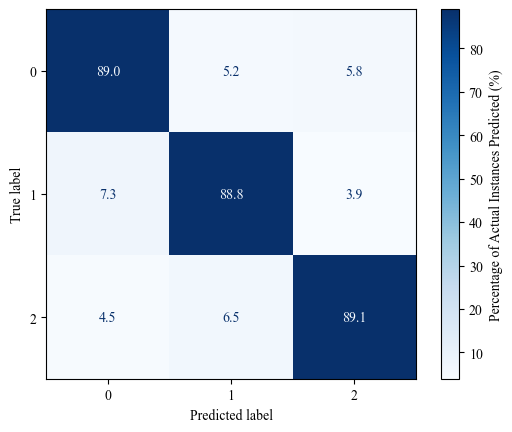

Mean Scores:
                AUC  Accuracy  F1 Score  Precision  Recall
MLPClassifier 0.969     0.889     0.889      0.891   0.889


In [80]:
from sklearn.neural_network import MLPClassifier

# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies MLPClassifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(
            hidden_layer_sizes=(200,),  # One hidden layer with 100 neurons
            activation='relu',
            solver='adam',
            alpha=0.0008,
            max_iter=400,
            random_state=42
        ))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['MLPClassifier']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

#plt.savefig('confusion_matrix_mlp.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))

c:\Thesis-script\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Thesis-script\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Thesis-script\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Thesis-script\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Thesis-script\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perc

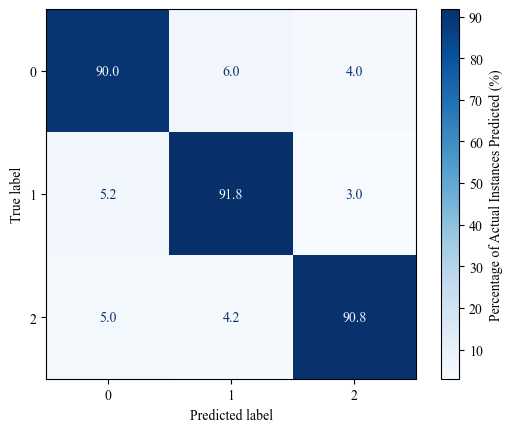

Parameters Used:
{'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0008, 'max_iter': 400, 'random_state': 42}

Mean Scores:
                AUC  Accuracy  F1 Score  Precision  Recall
MLPClassifier 0.982     0.909     0.909      0.910   0.909


In [81]:
from sklearn.neural_network import MLPClassifier

# Define the parameters used
params_used = {
    'hidden_layer_sizes': (100,),  
    'activation': 'logistic',
    'solver': 'adam',
    'alpha': 0.0008,
    'max_iter': 400,
    'random_state': 42
}

# Create a K-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store scores and a matrix to store confusion matrices sums
scores_list = []
conf_matrix_sum = np.zeros((3, 3))  # Assuming 3 classes (0, 1, 2)

# Loop over each fold in KFold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline that first scales the data then applies MLPClassifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(**params_used))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and sum it
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += conf_matrix

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T
mean_scores.index = ['MLPClassifier']

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_mlp100log.pdf')
plt.show()

# Display the mean scores along with the parameters used
print("Parameters Used:")
print(params_used)
print("\nMean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


In [82]:
from sklearn.model_selection import cross_validate

def evaluate_model(cv, model, X, y, model_name):
    # Perform K-Fold cross-validation and collect metrics
    cv_results = cross_validate(model, X, y, cv=cv, 
                                scoring=['roc_auc', 'accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                                return_train_score=False)
    
    # Create a DataFrame with the mean of the scores
    mean_scores = {metric: np.mean(values) for metric, values in cv_results.items()}
    mean_scores_df = pd.DataFrame([mean_scores])

    # Add model name to the DataFrame
    mean_scores_df['Model'] = model_name

    # Reorder the columns to have 'Model' first
    columns_order = ['Model'] + [col for col in mean_scores_df if col != 'Model']
    mean_scores_df = mean_scores_df[columns_order]

    return mean_scores_df

In [83]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

# Assuming your data is stored in a pandas DataFrame X and a pandas Series y

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform K-Fold cross-validation
cv_scores = cross_val_score(nb_classifier, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of the scores
cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

# Print the results
print(f'CV Accuracy (mean): {cv_scores_mean:.2f}')
print(f'CV Accuracy (std): {cv_scores_std:.2f}')


CV Accuracy (mean): 0.37
CV Accuracy (std): 0.03


Random Forest

In [84]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming your data is stored in a pandas DataFrame X and a pandas Series y

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest classifier
# Note: You can adjust n_estimators (number of trees) and other hyperparameters as needed
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with a scaler (if your features need scaling) and the Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
    ('rf', rf_classifier)
])

# Perform K-Fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of the scores
cv_scores_mean = np.mean(cv_scores)
cv_scores_std = np.std(cv_scores)

# Print the results
print(f'CV Accuracy (mean): {cv_scores_mean:.2f}')
print(f'CV Accuracy (std): {cv_scores_std:.2f}')


CV Accuracy (mean): 0.95
CV Accuracy (std): 0.02


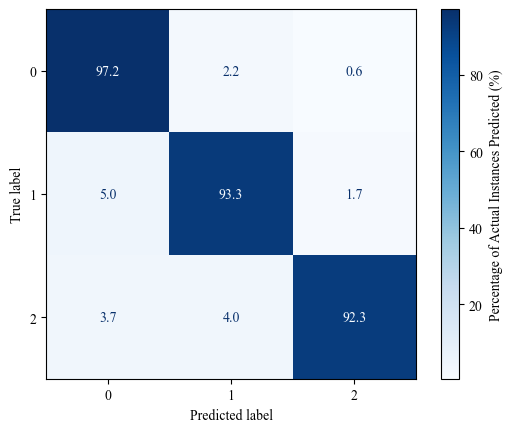

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.990     0.944     0.943      0.945   0.944


In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming your data is stored in a pandas DataFrame X and a pandas Series y

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the Random Forest classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_random_forest50.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


knn

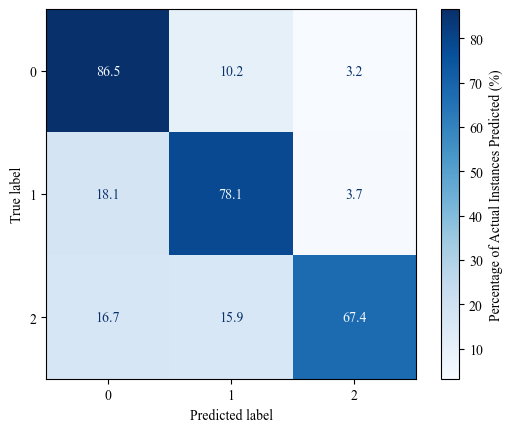

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.924     0.780     0.779      0.795   0.780


In [257]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the number of neighbors for KNN
n_neighbors = 15

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the KNN classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_knn20.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


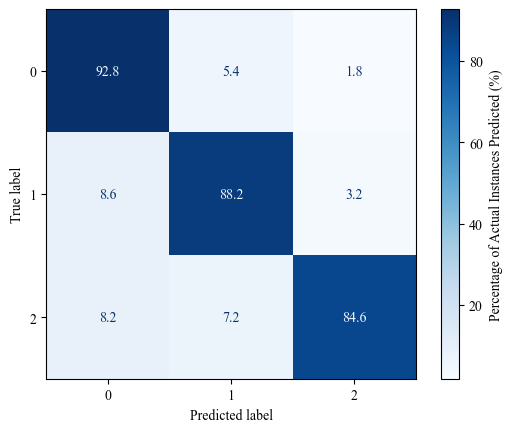

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.978     0.888     0.888      0.891   0.888


In [253]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the number of neighbors for KNN
n_neighbors = 10

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the KNN classifier
    pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
    ('knn', KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean', weights='distance'))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_knn10euc.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


In [ ]:
Ada boost 

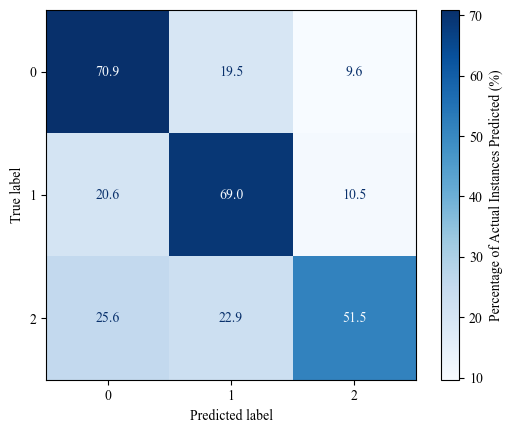

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.814     0.647     0.644      0.653   0.647


In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the number of estimators for AdaBoost
n_estimators = 50

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the AdaBoost classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
        ('ada', AdaBoostClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_adaboost50.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))


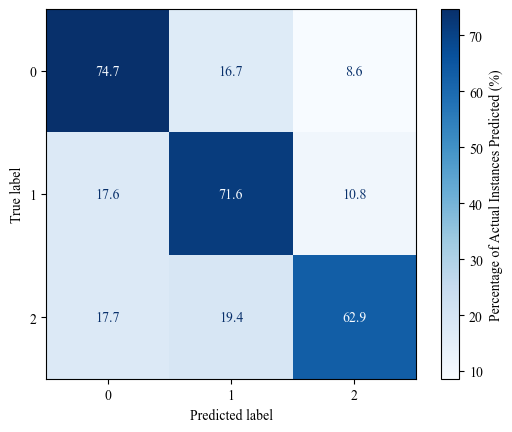

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.829     0.702     0.701      0.708   0.702


In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the number of estimators for AdaBoost
n_estimators = 100

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the AdaBoost classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
        ('ada', AdaBoostClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_adaboost100.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))

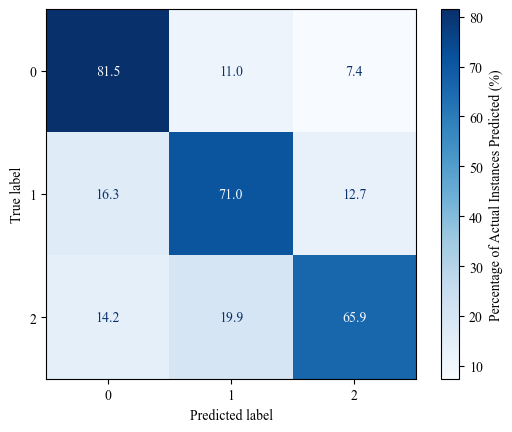

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.849     0.732     0.731      0.736   0.732


In [273]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the number of estimators for AdaBoost
n_estimators = 200

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the AdaBoost classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Optional: Remove if your data doesn't benefit from scaling
        ('ada', AdaBoostClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_adaboost200.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))

Naive Bayes Classifier

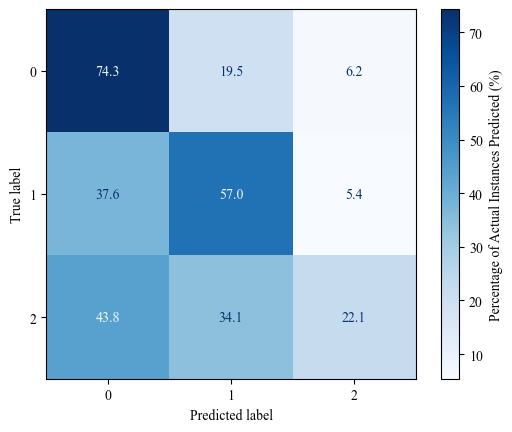

Mean Scores:
    AUC  Accuracy  F1 Score  Precision  Recall
0 0.702     0.532     0.507      0.550   0.532


In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores and confusion matrices
scores_list = []
conf_matrix_list = []

# Loop over each fold in KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a pipeline with a scaler and the Naive Bayes classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('nb', GaussianNB())
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold and add it to the list
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    # Collect the scores for this fold
    scores_list.append({
        'AUC': roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr', average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Calculate mean scores and round to 3 decimal places
mean_scores = pd.DataFrame(scores_list).mean().round(3).to_frame().T

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(conf_matrix_list, axis=0)

# Manually normalize the confusion matrix to get percentages
conf_matrix_normalized = 100 * mean_conf_matrix / mean_conf_matrix.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix
plt.rcParams['font.family'] = 'Times New Roman'
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # One decimal point

# Add label to the color bar
disp.im_.colorbar.set_label('Percentage of Actual Instances Predicted (%)')

plt.savefig('confusion_matrix_naive_bayes.pdf')
plt.show()

# Display the mean scores
print("Mean Scores:")
print(mean_scores.to_string(float_format='{:,.3f}'.format))
